<a href="https://colab.research.google.com/github/sprapaka/KidneyClassification/blob/main/Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split-folders

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import tensorflow as tf
import cv2

from PIL import Image, ImageOps
import scipy.ndimage as ndi

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
import matplotlib.pyplot as plt

from skimage import transform
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import splitfolders

In [ ]:
ROOT_FOLDER = '/content/drive/MyDrive/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
os.listdir(ROOT_FOLDER)


['Normal', 'Cyst', 'Stone', 'Tumor']

In [ ]:
#os.listdir('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/')

os.listdir('/content/drive/MyDrive/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')
path_main = ('/content/drive/MyDrive/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')


for folder in os.listdir(path_main):
    list_of_elements = os.listdir(os.path.join(path_main, folder))
    print(f'Folder: {folder}\n')
    print(f'Number of elements: {len(list_of_elements)}\n')
    print(f'First item\'s name: {list_of_elements[0]}\n')
    print('***************************')

Folder: Normal

Number of elements: 981

First item's name: Normal- (10).jpg

***************************
Folder: Cyst

Number of elements: 3709

First item's name: Cyst- (3233).jpg

***************************
Folder: Stone

Number of elements: 1377

First item's name: Stone- (1280).jpg

***************************
Folder: Tumor

Number of elements: 2301

First item's name: Tumor- (2213).jpg

***************************


In [ ]:
#Looking into data "Images"
def plot_imgs(item_dir,title, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
   # plt.title(title)
    for idx, img_path in enumerate(item_files):

        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.title( title+f'{img_path}'[-10:-4])
        plt.imshow(img)

    plt.tight_layout()

In [ ]:
path_normal = os.path.join(ROOT_FOLDER, 'Normal')
path_stone = os.path.join(ROOT_FOLDER, 'Stone')
path_cyst = os.path.join(ROOT_FOLDER, 'Cyst')
path_tumor = os.path.join(ROOT_FOLDER, 'Tumor')

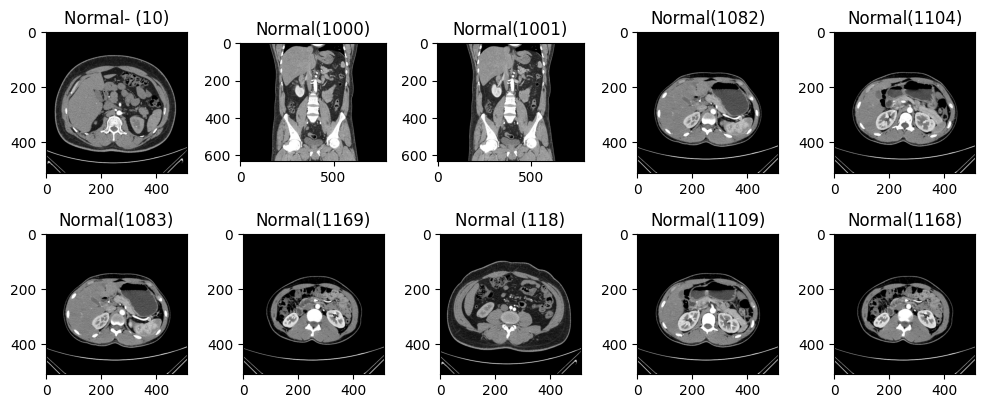

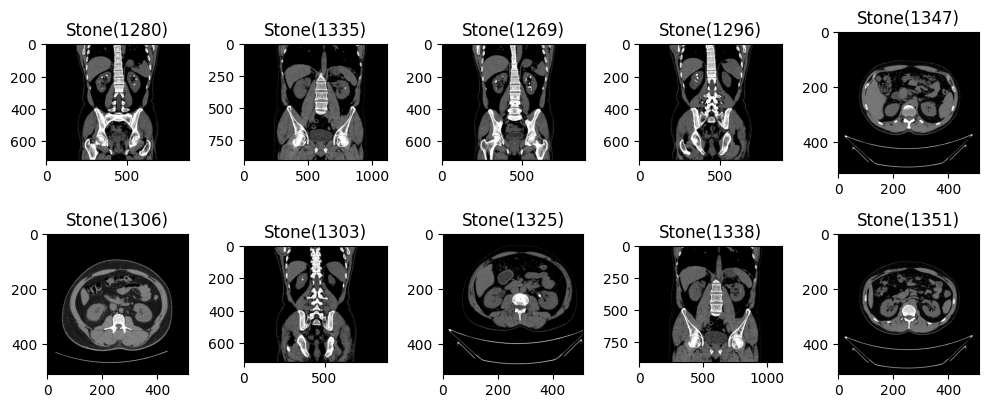

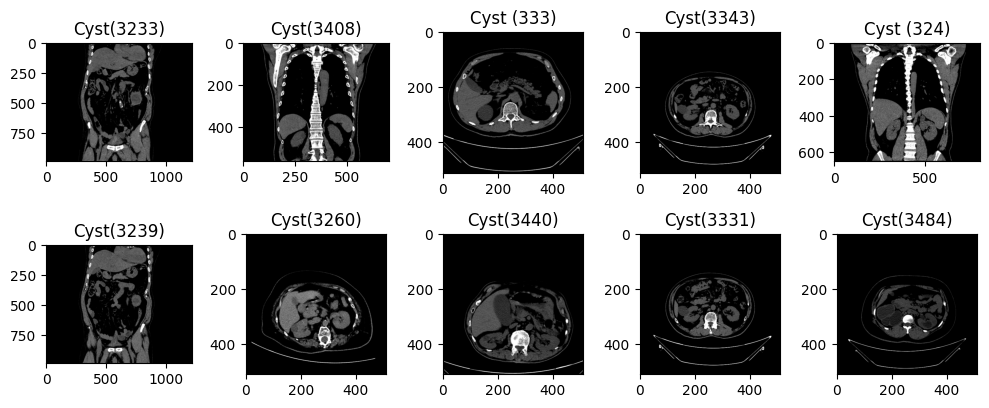

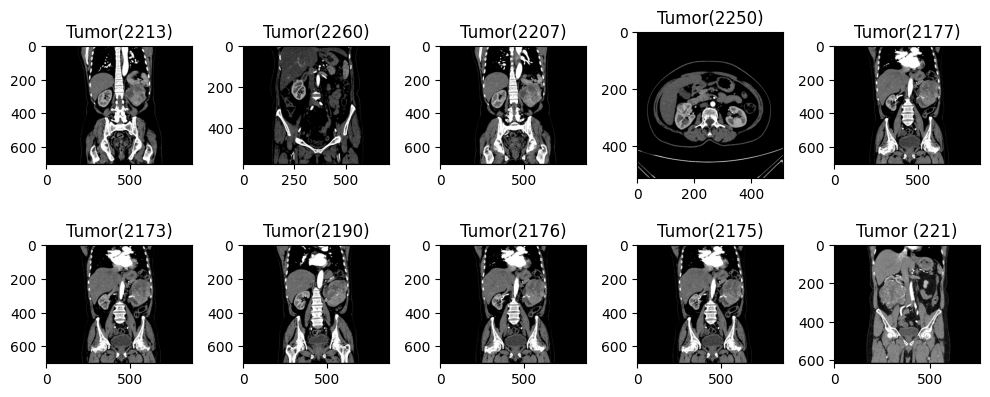

In [ ]:
plot_imgs(path_normal, 'Normal', 10)
plot_imgs(path_stone,  'Stone', 10)
plot_imgs(path_cyst, 'Cyst', 10)
plot_imgs(path_tumor,  'Tumor', 10)

In [ ]:
splitfolders.ratio(
   ROOT_FOLDER,
   output="./dataset",
   seed=7,
   ratio=(0.8,0.1, 0.1)
)

Copying files: 8368 files [01:57, 71.42 files/s] 


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)


In [ ]:
# import os
# import shutil

# train_dir = '/content/dataset/train'
# test_dir = '/content/dataset/test'
# val_dir = '/content/dataset/val'

# os.listdir(test_dir)
# shutil.rmtree('/content/dataset/val/.ipynb_checkpoints')


In [ ]:
train_dataset = train_datagen.flow_from_directory('./dataset/train',
                                                  target_size=(200, 200),
                                                  color_mode='grayscale',
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  )

test_dataset = test_datagen.flow_from_directory('./dataset/test',
                                                target_size=(200, 200),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=100,
                                                shuffle=False
                                                )

valid_dataset = valid_datagen.flow_from_directory('./dataset/val',
                                                  target_size=(200, 200),
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  color_mode='grayscale',
                                                  )

Found 6692 images belonging to 4 classes.
Found 841 images belonging to 4 classes.
Found 835 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([

  tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=train_dataset.image_shape),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

  tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

  tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

  tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax'),

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [ ]:
import keras
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

In [ ]:
model_fit = model.fit(train_dataset,
                      validation_data=valid_dataset,
                      steps_per_epoch = 3,
                      epochs = 30)

Epoch 1/30
3/3 [==============================] - 28s 6s/step - loss: 1.3285 - accuracy: 0.3467 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.2573 - val_accuracy: 0.4431 - val_precision: 0.4822 - val_recall: 0.3737
Epoch 2/30
3/3 [==============================] - 11s 5s/step - loss: 1.2684 - accuracy: 0.5033 - precision: 0.4595 - recall: 0.1133 - val_loss: 1.1972 - val_accuracy: 0.5820 - val_precision: 1.0000 - val_recall: 0.0132
Epoch 3/30
3/3 [==============================] - 10s 5s/step - loss: 1.2121 - accuracy: 0.5567 - precision: 0.5597 - recall: 0.2500 - val_loss: 1.0858 - val_accuracy: 0.5820 - val_precision: 0.8147 - val_recall: 0.2263
Epoch 4/30
3/3 [==============================] - 10s 4s/step - loss: 1.0507 - accuracy: 0.6067 - precision: 0.8351 - recall: 0.2700 - val_loss: 1.0812 - val_accuracy: 0.5533 - val_precision: 0.6393 - val_recall: 0.5222
Epoch 5/30
3/3 [==============================] - 11s 5s/step - loss: 0.9972 - accuracy: 0.5667 - precision: 0.6

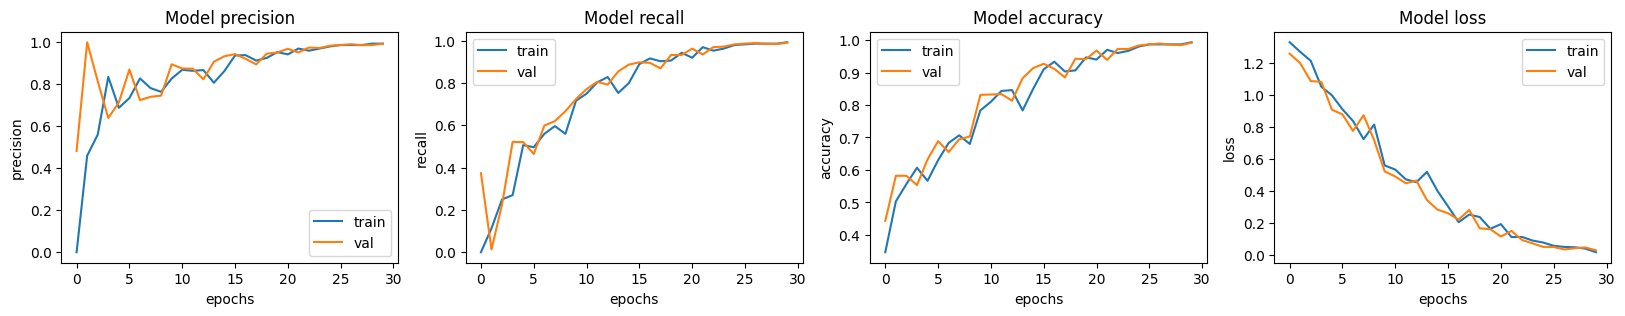

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(model_fit.history[met])
    ax[i].plot(model_fit.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

9/9 [==============================] - 12s 1s/step
Accuracy: 0.9940546967895363
Precision: 0.9914595893688032
Recall: 0.9909864316339136
F1_score: 0.9911989378380488


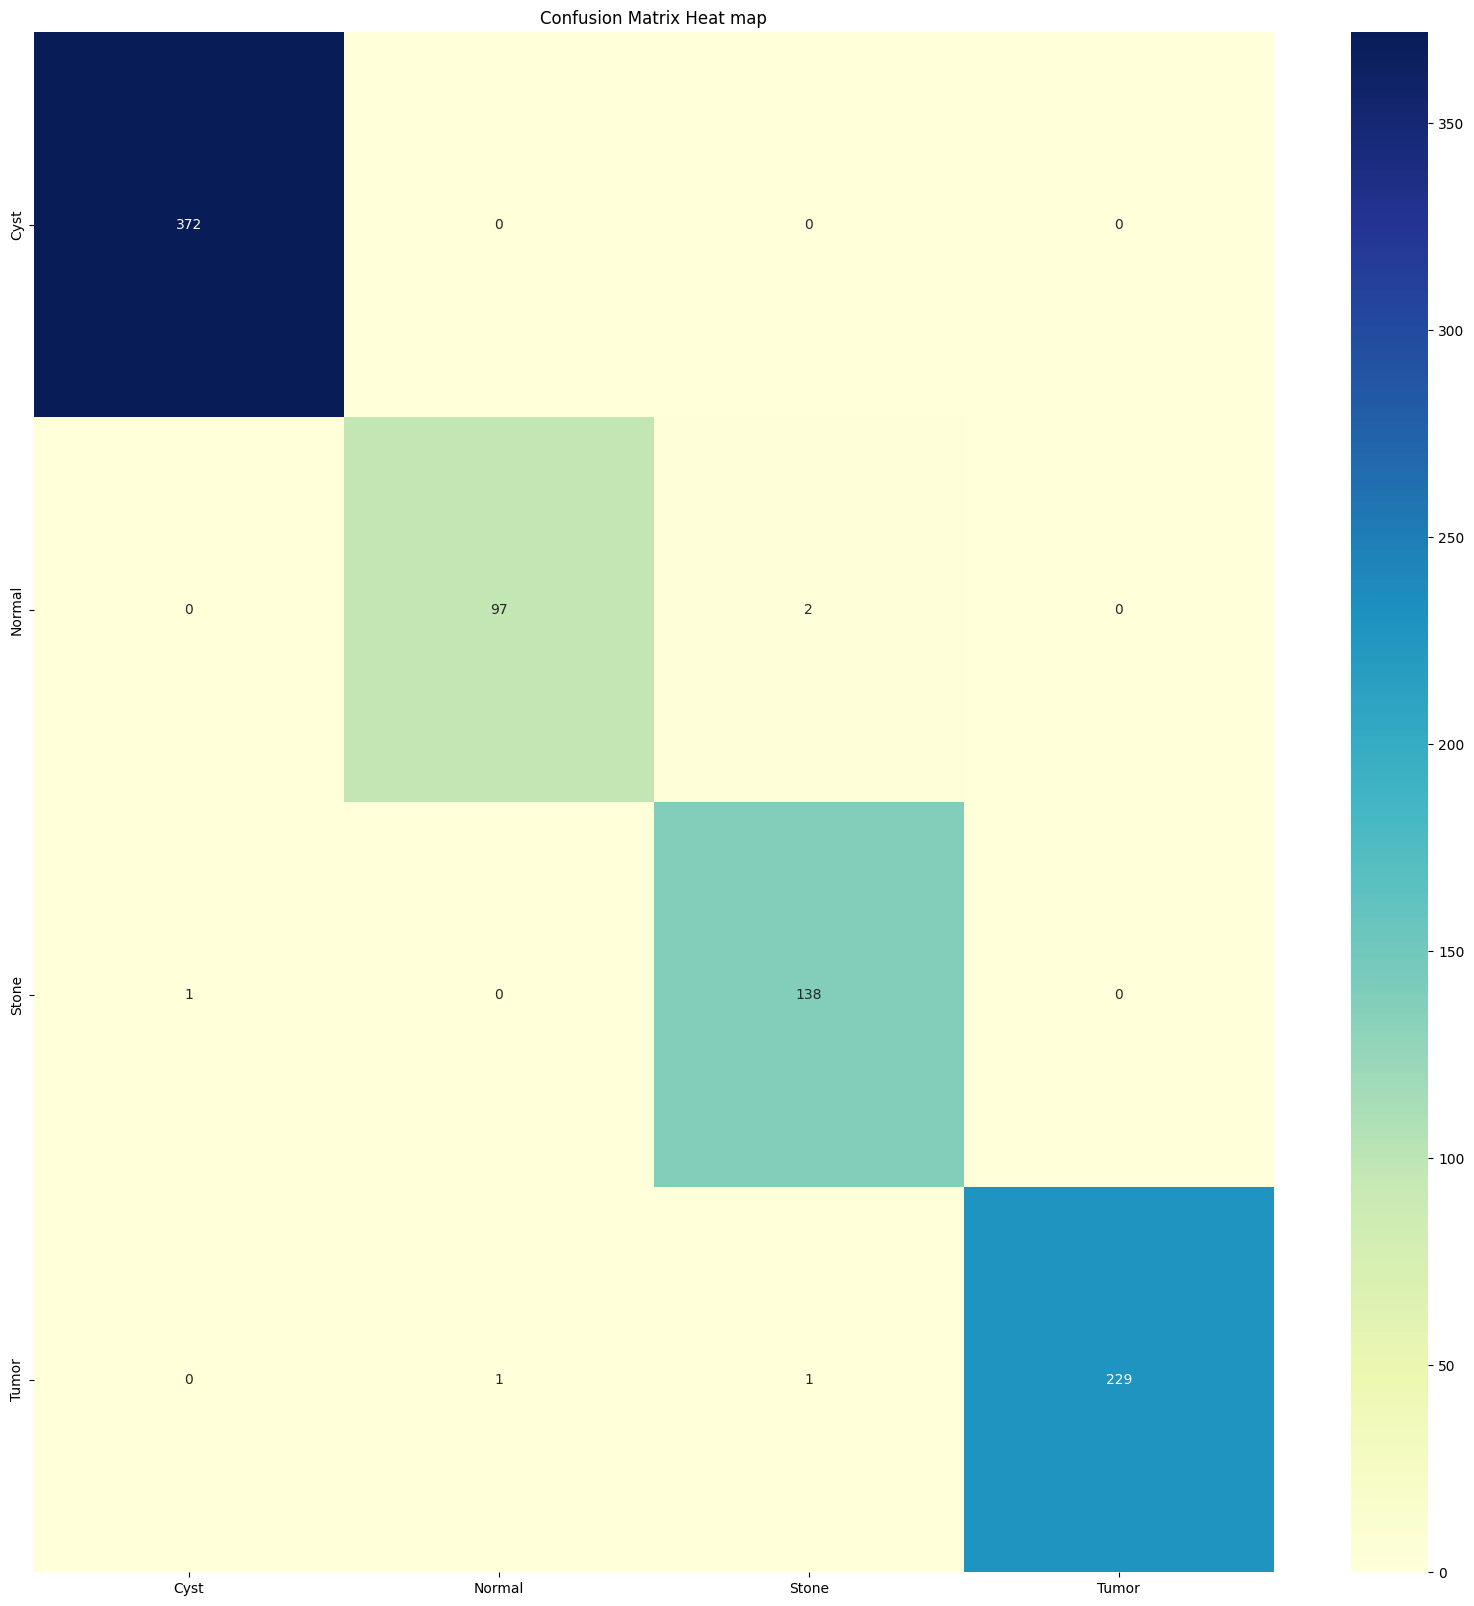

In [ ]:
predictions = model.predict(test_dataset)
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(20,20))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()
evaluate(test_dataset.classes,predictions)

In [ ]:
model.evaluate(test_dataset)

9/9 [==============================] - 7s 660ms/step - loss: 0.0327 - accuracy: 0.9941 - precision: 0.9940 - recall: 0.9929


[0.03271862864494324,
 0.9940546751022339,
 0.9940476417541504,
 0.9928656220436096]

In [19]:
model.save('/content/kidneyCancer.h5')

In [20]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [ ]:
import gradio as gr
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import cv2



# Define the paths and filenames
model_path = "/content/kidneyCancer.h5"


# Load the model and label encoder
model = load_model(model_path)

class_names = ["Tumor", "Cyst", "Normal", "Stone"]
def predict_input_image(img):

  print(img.shape)
  print(type(img.shape))
  # (225, 400, 3)
  # <class 'tuple'>








  img_4d=img.reshape(-1,200, 200, 1)
  # print("4d shape",img_4d.shape)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(4)}
image = gr.inputs.Image(shape=(200,200))
label = gr.outputs.Label(num_top_classes=4)

interface = gr.Interface(fn=predict_input_image, inputs=image, outputs=label,title="Kidney Image Classifier",interpretation='default').launch(debug='True')

# Run the Gradio interface
interface.launch()

<ipython-input-57-126b174b1b72>:35: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(200,200))
<ipython-input-57-126b174b1b72>:35: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(200,200))
<ipython-input-57-126b174b1b72>:36: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=4)
<ipython-input-57-126b174b1b72>:36: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=4)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

(200, 200, 3)
<class 'tuple'>
1/1 [==============================] - 0s 286ms/step
(200, 200, 3)
<class 'tuple'>
1/1 [==============================] - 0s 28ms/step
(200, 200, 3)
<class 'tuple'>
1/1 [==============================] - 0s 18ms/step
